In [1]:
import numpy as np
import h5py
import matplotlib.pylab as plt
import sys
import seaborn as sns
import fastmri
import torch
import xml.etree.ElementTree as etree
import matplotlib as mpl
sys.path.append('../../src/')

from importlib import reload
from tqdm import tqdm
from fastmri.data import transforms as T

# custom scripts
from helpers import calculate_metrics

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
mpl.rc('image', cmap='gray')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

<module 'fastmri_custom' from '../../src/fastmri_custom.py'>

Using 25.0% k-space points


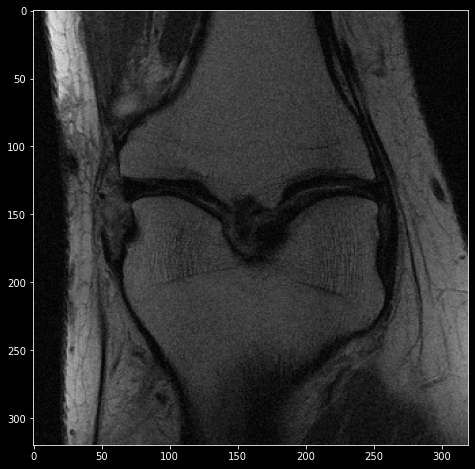

In [2]:
import fastmri_custom as fc
reload(fc)

DATA_PATH = '../../data/FastMRIData/singlecoil_train/'
FILE_SAMPLE = DATA_PATH + 'file1001287.h5'

mri_data = fc.AdaptedFastMRI(mask_type="equispaced")
mri_data(FILE_SAMPLE)

_ = plt.imshow(mri_data.gt_image)

# Mask -> Zero Filled -> Ground truth

Zero filled reconstruction:
PSNR: -37.27276411102872
SSIM: 4.189920566254474e-05
SNR: -49.90827009246922
MSE: 0.0007471070496379213


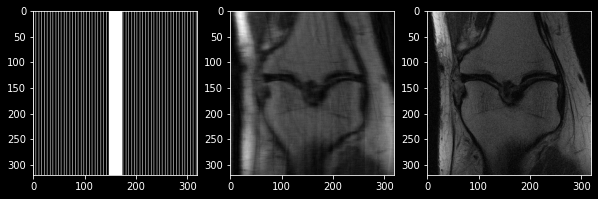

In [3]:
_ = fig, ax = plt.subplots(1, 3)
_ = ax[0].imshow(mri_data.get_2dmask())
_ = ax[1].imshow(mri_data.zero_fill(mri_data.masked_cropped_kspace))
_ = ax[2].imshow(mri_data.gt_image)

In [4]:
from importlib import reload
import mri_cs
reload(mri_cs)

filters = [[[1.0, -1.0], [1.0, -1.0]],
            [[1.0, 1.0], [-1.0, -1.0]],
            [[1.0, -1.0], [-1.0, 1.0]]]

tol_cg = 1e-9
maxiter_cg = 2 * mri_data.b.size
rows, cols = mri_data.cropped_shape

recon = mri_cs.prefiltering(mri_data.samples_rows, mri_data.b, rows, cols, 
                            h=filters, p=1, tol_cg=tol_cg, 
                            maxiter_cg=maxiter_cg, number_jobs=1, 
                            verbose=False)

<module 'mri_cs' from '../../src/mri_cs.py'>

####### Reconstructing filtered image 1 of 3 #######
####### Reconstructing filtered image 2 of 3 #######
####### Reconstructing filtered image 3 of 3 #######
Prefiltering elapsed time: 169.44269037246704s


No PI CS
PSNR: 27.422871597916206
SSIM: 0.6300949051944844
SNR: 14.787365616475693
MSE: 2.534073827894902e-10
Zero filled reconstruction:
PSNR: -37.27276411102872
SSIM: 4.189920566254474e-05
SNR: -49.90827009246922
MSE: 0.0007471070496379213


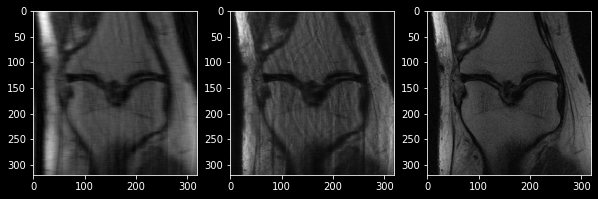

In [5]:
print("No PI CS")
_ = calculate_metrics(mri_data.gt_image, np.abs(recon))

_ = fig, ax = plt.subplots(1, 3)
_ = ax[0].imshow(mri_data.zero_fill(mri_data.masked_cropped_kspace))
_ = ax[1].imshow(np.abs(recon))
_ = ax[2].imshow(mri_data.gt_image)